# Tutorial Exercises: non-parametric tests 

<font color='red'> Hi tutors, this week the students should practice running the rank-sum and sign-rank tests. They can also re-practice permutation tests. The last exercise is designed to emphasise the key conceptual learning for the week, which is that the (null) distribution of the test statistic depends on the sample distribution (in all cases), but how much information we retain about the sample distribution is different between tests: in permutation tests we keep the sample sizes, and the overall data distribution (plus any pairings); in the rank-based test we keep the sample sizes and any pairings, but replace the actual data with their ranks. One consequence of this is that rank-based tests are less sensitive to outliers in the sample. You may wish to discuss with students whether this is always a good thing (!) with reference to the previous material (in the section on data wrangling) about sources of outliers - ie some outliers are noise (hopefully, many of these are reomved in the data wrangling process), and some are real but unusual data.
             
Here are some exercises on comparing groups of data (medians or means) using rank-based non-parametric tests, or permutation tests</font>


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [25]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## 1. Whose peaches are heavier?

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/peaches.png" width=30% alt="There should be a picture of some peaches here" >


Mr Robinson’s juice factory buys peaches from farmers by the tray. Each tray contains 50 peaches. Farmer MacDonald claims that this is unfair as his peaches are juicier and therefore weigh more than the peaches of his rival, Mr McGregor. 

Mr Robinson weighs eight trays of Farmer MacDonald’s peaches and 8 trays of Mr McGregor’s peaches. 

Investigate whether MacDonald's claim is justified by testing for a difference in weight between MacDonald and McGregor's peaches using a non-parametric (rank-based) test.

a) Load the data into a Pandas dataframe

In [26]:
peaches = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/peaches.csv')
peaches

,McGregor,MacDonald
0,7.867,8.289
1,7.637,7.972
2,7.652,8.237
3,7.772,7.789
4,7.510,7.345
5,7.743,7.861
6,7.356,7.779
7,7.944,7.974


b) Plot the data and comment. 

A Kernel desity estimate plot (to show the distribution) and rug plot (to show individual data points) would be a good choice here. You should comment on the data distribution 

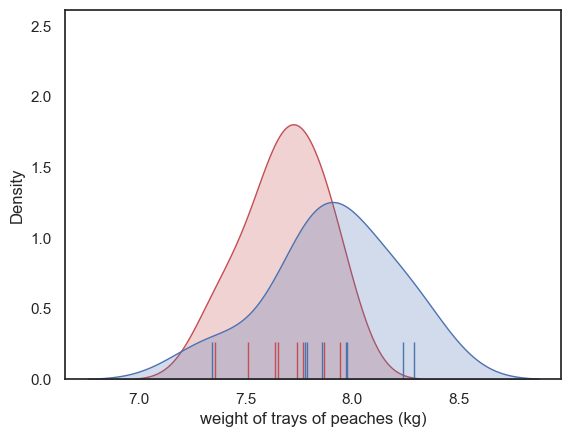

In [45]:
# your code here to plot the data
sns.kdeplot(data=peaches.McGregor, color='r', fill=True)
sns.rugplot(x=peaches.McGregor, color='r', height=0.1)
sns.kdeplot(data=peaches.MacDonald, color='b', fill=True)
sns.rugplot(x=peaches.MacDonald, color='b', height=0.1)
plt.xlabel('weight of trays of peaches (kg)')
plt.show()

c) Conduct an appropriate rank-based non-parametric test of Farmer MacDonald's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The median weight of trays of peaches is the same for Farmer MaacDonald and Farmer McGregor's farms
* <font color='red'> Ha: The median weight is higher for Farmer MacDonald's farm

<font color='red'>We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> The hypotheses concern the median weight rather than the mean because this is a rank based test - please check back on the reading for an explanation.
* <font color='red'> The alternative hypothesis is *directional* as MacDonald claims his trays of peaches are heavier (not lighter). This means we need to choose a one-tailed test and choose the correct value of `alternative` when we run `stats.mannwhitneyu`

<font color='red'>**Descriptive Statistics**
<font color='red'>We need to report the median, sample size, and a measure of spread for each group. Unfortunately there is no tidy way to do this with `df.agg()` but the following works - or they could used 'df.describe()` but would then need to write some text saying which were the relevant descriptives (I knock off marks for just dumping all descriptives without any text).
</font>

In [28]:
peaches.quantile([0.25, 0.5, 0.75])

,McGregor,MacDonald
0.25,7.60525,7.78650
0.50,7.69750,7.91650
0.75,7.79575,8.03975


In [29]:
peaches.count()

McGregor     8
MacDonald    8
dtype: int64

<font color='red'>Farmer MacDonald's trays of peaches (n=8, median = 7.92kg, q1=7.79, q3=8.04) are slightly heavier than Farmer McGregor's (n=8, median = 7.70kg, q1=7.61, q3=7.80)</font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`, bearing in mind that the order in which you input the data also matters (`alternative=greater` tests whether the first dataset is greater than the second)

In [30]:
stats.mannwhitneyu(peaches.MacDonald, peaches.McGregor, alternative='greater')

MannwhitneyuResult(statistic=50.0, pvalue=0.032478632478632474)

<font color='red'> As the p-value is less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> The trays of peaches from Farmer MacDonald are heavier

d) Conduct a permutation test of the same claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The mean weight of trays of peaches is the same for Farmer MacDonald and Farmer McGregor's farms
* <font color='red'> Ha: The mean weight is higher for Farmer McDonald's farm

<font color='red'>We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> In this case, we are testing for a difference of *means* not medians, since we calculate the group means in each shuffled dataset 

<font color='red'>**Descriptive Statistics**

<font color='red'>We need to report the mean, sample size, and a measure of spread for each group. Here we can use `df.agg()` to get the mean and standard deviation.
</font>

In [31]:
peaches.agg({'McGregor':['mean', 'std', 'count'], 'MacDonald':['mean', 'std', 'count']})

,McGregor,MacDonald
mean,7.685125,7.905750
std,0.190262,0.295633
count,8.000000,8.000000


<font color='red'>Farmer MacDonald's trays of peaches (n=8, mean = 7.91kg, sd=0.30) are slightly heavier than Farmer McGregor's (n=8, mean = 7.70kg, sd=0.19)</font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`, bearing in mind that the order in which you input the data also matters. You must also choose the correct `permutation type` 

In [32]:
def dMeans(x,y):
    return np.mean(x)-np.mean(y)


stats.permutation_test((peaches.MacDonald, peaches.McGregor), dMeans, permutation_type='independent', alternative='greater')

PermutationTestResult(statistic=0.22062500000000007, pvalue=0.0468, null_distribution=array([ 1.25125e-01, -3.16250e-02, -1.25000e-04, ..., -7.11250e-02,
       -4.28750e-02,  8.31250e-02]))

<font color='red'> As the p-value is less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> The trays of peaches from Farmer MacDonald are heavier

## 2. IQ and vitamins

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/vitamins.jpg" width=50% alt="There should be a picture of some vitamin pills here" >

The VitalVit company claim that after taking their VitalVit supplement, IQ is increased. 

They run a trial in which 22 participants complete a baseline IQ test, then take VitalVit for six weeks, then complete another IQ test.

a) What kind of design is this.

<font color='red'> repeated measures

b) What are the advantages and possible disadvantages of this type of design? Should the company have done something different or additional to rule out confounding factors?

<font color='red'> The main disadvantage is order effects (improvement on 2nd test could simply be due to practice). The researchers should have counterbalanced the order or used separate groups of people

c) Load the data into a Pandas dataframe

In [33]:
vitamin = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/vitalVit.csv')
vitamin

,ID_code,before,after
0,688870,82.596,83.437
1,723650,117.200,119.810
2,445960,85.861,83.976
3,708780,125.640,127.680
4,109960,96.751,99.103
5,968530,105.680,106.890
6,164930,142.410,145.550
7,744410,109.650,109.320
8,499380,128.210,125.110
9,290560,84.773,87.249


d) Plot the data and comment. 

<font color='red'> A scatterplot would be a good choice as these are paired data. 
You could add the line of equality (line x=y) to the graph so we can see whether most people score higher on the IQ test before or after taking VitalVit

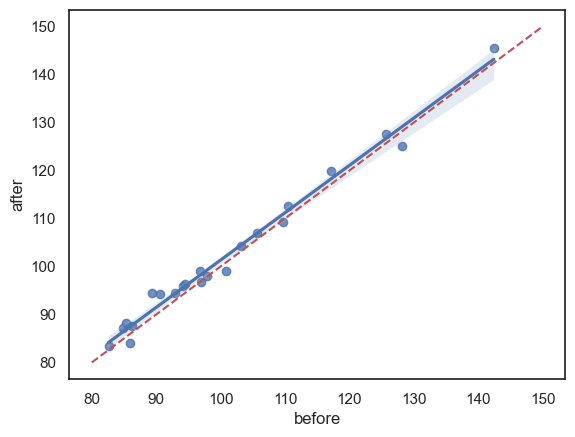

In [34]:
# Your code here for a scatter plot.
sns.regplot(data=vitamin, x='before', y='after')
plt.plot([80,150],[80,150],'r--')
plt.show()

e) Conduct a suitable rank-based non-parametric test of VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The median change in IQ after taking VItalVit is zero 
* <font color='red'> Ha: The median change n IQ is positive

<font color='red'> We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> The hypotheses concern the median change in IQ rather than the mean because this is a rank based test - please check back on the reading for an explanation.
* <font color='red'> We are testing the median *change* in IQ (within subjects) rather than the difference of medians (between the before- and after- datasets) as this is a paired test.
* <font color='red'> The alternative hypothesis is *directional* as VitalVit is supposed to increase IQ, not decrease it. This means we need to choose a one-tailed test and choose the correct value of `alternative` when we run `stats.wilcoxon()`

<font color='red'>**Descriptive Statistics**
* <font color='red'>We need to report the median difference, sample size (number of pairs), and a measure of spread for the differences. 
* <font color='red'> I would advise also reporting these statistics for each session (before/after) as this gives the reader a fuller picture of the data (are the changes in IQ score within individuals large, compared to the variation between individuals)

</font>

In [41]:
# add a column for the change in IQ for each individual
vitamin['change']=vitamin.after-vitamin.before

# report sample size (any column will do as data are paired)
print('n = ' + str(vitamin.before.count()))

# get quantiles
vitamin.quantile([0.25, 0.5, 0.75])


n = 22


,ID_code,before,after,change
0.25,316770.0,89.7220,94.21325,0.30475
0.50,540500.0,96.8515,97.38500,1.74950
0.75,719932.5,108.6575,108.71250,2.44500


<font color='red'> The median change in IQ is positive (n=22, median(after-before) = 1.71, q1=0.30, q3=2.45). The change is small compared to the median value for IQ in each group (before: median=96.9, [q1,q3] = [89.7,108.7]. after: median = 97.4, [q1,q3] = [94.2,108.7]) </font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`, bearing in mind that the order in which you input the data also matters.

In [8]:
stats.wilcoxon(vitamin.after, vitamin.before, alternative='greater')

WilcoxonResult(statistic=208.0, pvalue=0.003324747085571289)

<font color='red'> As the p-value is less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> VitalVit does indeed increase IQ

f) Conduct a suitable permutation test of VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The mean change in IQ after taking VitalVit is zero 
* <font color='red'> Ha: The mean change in IQ is positive

<font color='red'> We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> The hypotheses concern the mean change in IQ as we are calculating the mean change in each shuffled dataset
* <font color='red'> We are testing the mean *change* in IQ (within subjects) rather than the difference of means (between the before- and after- datasets) as this is a paired test.
* <font color='red'> The alternative hypothesis is *directional* as VitalVit is supposed to increase IQ, not decrease it. This means we need to choose a one-tailed test and choose the correct value of `alternative` when we run the test

<font color='red'>**Descriptive Statistics**
* <font color='red'>We need to report the mean difference, sample size (number of pairs), and a measure of spread for the differences (sd). 
* <font color='red'> I would advise also reporting these statistics for each session (before/after) as this gives the reader a fuller picture of the data (are the changes in IQ score within individuals large, compared to the variation between individuals)

</font>

In [43]:
vitamin.agg({'before':['mean', 'std', 'count'], 'after':['mean', 'std', 'count'] , 'change':['mean', 'std', 'count']})

,before,after,change
mean,100.963409,102.284000,1.320591
std,15.815174,15.714324,1.907622
count,22.000000,22.000000,22.000000


<font color='red'> The mean change in IQ is positive (n=22, mean(after-before) = 1.32, sd=1.91). The change is small compared to the mean value for IQ in each group (before: mean=101.0, sd=15.8. after: mean = 102.3, sd=15.7) </font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`, bearing in mind that the order in which you input the data also matters. You must also choose the correct `permutation type` 

In [9]:
def mDiff(x,y):
    return np.mean(x-y)

stats.permutation_test((vitamin.after, vitamin.before), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=1.320590909090907, pvalue=0.0021, null_distribution=array([-0.45495455, -0.46868182, -0.0745    , ..., -0.71031818,
        0.41022727, -0.41740909]))

<font color='red'> As the p-value is less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> VitalVit does indeed increase IQ

## 3. Socks

In the section on permutation testing, we introduced a dataset on sock ownership (number of pairs of socks owned for 14 husband-wife couples. We noticed that when using a permutation test for difference of means, the null distribution of the difference of means was strongly affected by the presences of an outlier: 
* in one couple the husband owned about 30 more pairs of socks than the wife
* whehter the difference of means in each permutation was positive or negative depended disproportionately on whether this couple were 'flipped' or not in that particular permutation

Let's compare the use of the rank-based (Wilcoxon's Sign-Rank test) test with the permutation test for the mean difference.

**a. Load the data (done for you)**

In [10]:
socks = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/socks.csv')
socks

,Husband,Wife
0,10,12
1,17,13
2,48,20
3,28,25
4,23,18
5,16,14
6,18,13
7,34,26
8,27,22
9,22,14


**b. Plot the data (done for you)**

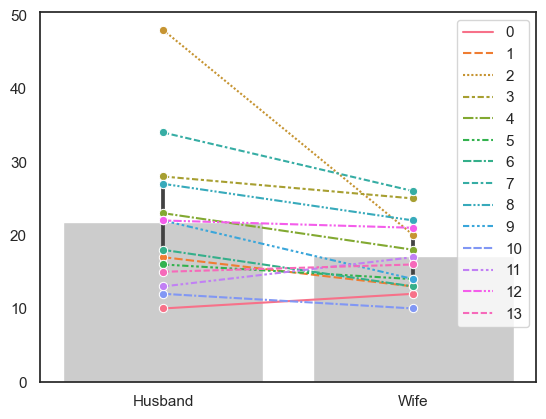

In [11]:
sns.barplot(data=socks, color=[0.8,0.8,0.8])
sns.lineplot(data=socks.T, marker='o')
plt.show()

**c. Carry out a suitable rank-based non-parametric test of the hypothesis that men own more socks than women**

In [12]:
stats.wilcoxon(socks.Husband, socks.Wife, alternative='greater')

WilcoxonResult(statistic=92.0, pvalue=0.00537109375)

**d. Carry out a suitable permutation test test of the hypothesis that men own more socks than women**

In [13]:
stats.permutation_test((socks.Husband, socks.Wife), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=4.571428571428571, pvalue=0.0068, null_distribution=array([-2.        , -1.85714286, -1.85714286, ..., -2.57142857,
       -2.57142857,  2.        ]))

**e. Compare the two tests.**

In this case the rank-based test has a (slightly) smaller $p$-value than the permutation test. 

The permutation test preserves the following features of the data:
1. In each couple one partner usually has more socks (what we shuffle is *which* partner this is)
2. One couple has an extreme difference in sock-counts (we shuffle whether it is the husband or wife who has more socks)
3. We retain the sample sizes and overall distribution of difference of means

The rank-based test 'neutralizes' one of these features, which is it and what is the effect?

<font color='red'>The main difference is that the outlier (extreme difference) has less effect in the rank-based test</font>